<a href="https://colab.research.google.com/github/KFrimps/Perceptron/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

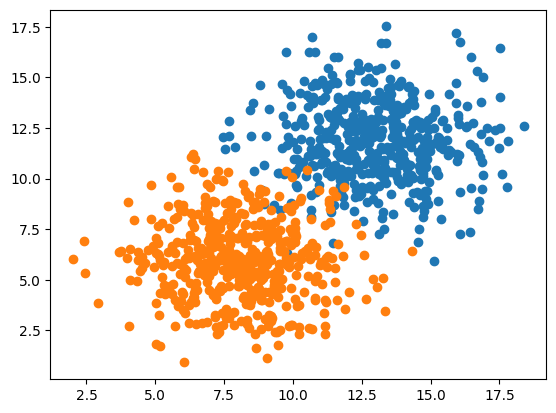

In [ ]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [ ]:
model = Sequential()
model.add(Dense(units = 1, input_shape =(2,), activation='sigmoid'))
adam = Adam(learning_rate = 0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs = 500, shuffle='true')

Epoch 1/500
20/20 [==============================] - 0s 2ms/step - loss: 1.9725 - accuracy: 0.4170
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.9363 - accuracy: 0.5270
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.8200
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8940
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.9090
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.9160
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2662 - accuracy: 0.9410
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2415 - accuracy: 0.9500
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2187 - accuracy: 0.9600
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9560
Epoch 11/

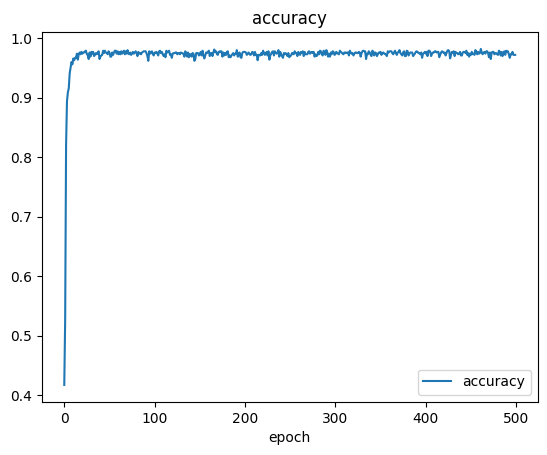

In [ ]:
plt.plot(h.history['accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

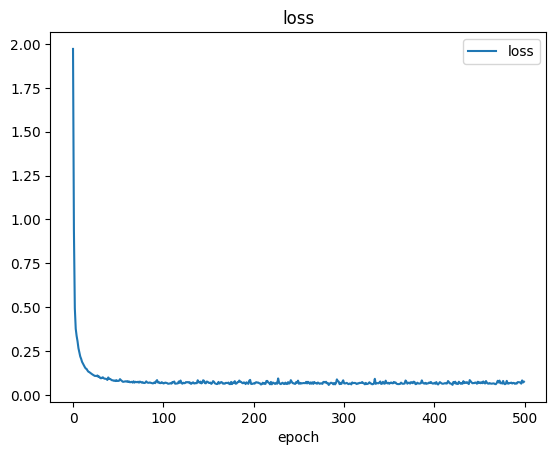

In [ ]:
plt.plot(h.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [17]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
  y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  pred_func = model.predict(grid)
  z = pred_func.reshape(xx.shape)
  plt.contourf(xx, yy, z)


79/79 [==============================] - 0s 1ms/step


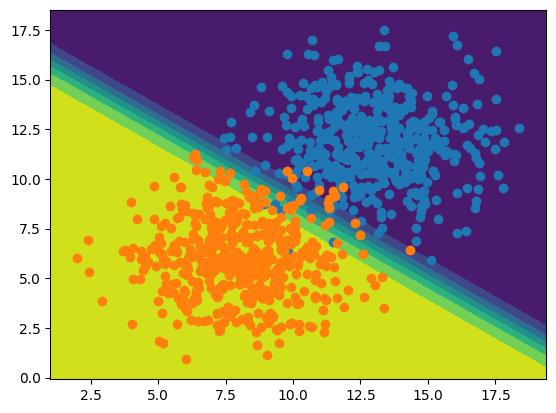

In [19]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 22ms/step
prediction is [[0.9999842]]


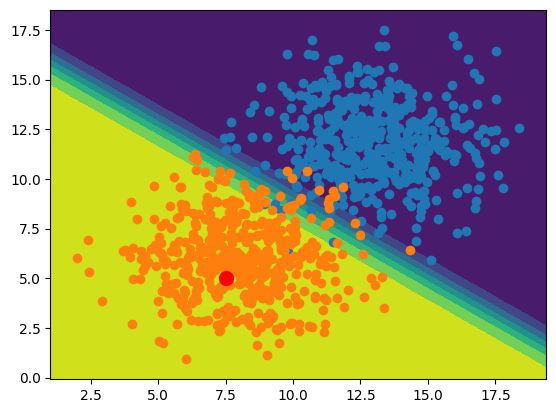

In [21]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 7.5
y = 5
point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker="o", markersize=10, color="red")
print("prediction is", prediction)
